# Plotting zonal means: panels

If we have several variables or quantities and we want to use panels, we can use a function in obrero called `panel_zonal_mean()` part of the `obrero.plot` module. Let's import obrero:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
import obrero.plot as oplot

Now we read some data:

In [11]:
# file name
f1 = 'data/ctl.nc'

# read as data array
da = obrero.read_nc(f1, 'pr')
db = obrero.read_nc(f1, 'tas')

# convert units
da.convert_units('mm day-1')
db.convert_units('Celsius')

And we compute zonal means:

In [12]:
zm1 = obrero.get_zonal_means(da, time_mean=True)
zm2 = obrero.get_zonal_means(db, time_mean=True)

And we now use lists for data and specifications. Specifications are the same as those for `plot_zonal_mean()`:

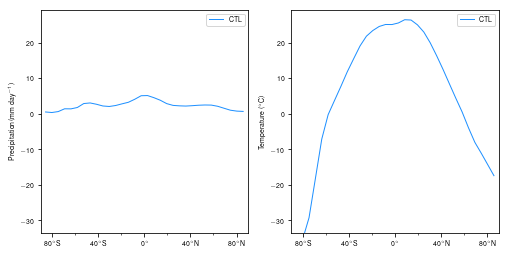

In [4]:
%matplotlib inline
sty = dict(linestyle='-', color='DodgerBlue', linewidth=1.0, label='CTL')
spec1 = dict(style=sty, ylabel=r'Precipitation (mm day$^{-1}$)')
spec2 = dict(style=sty, ylabel=r'Temperature ($^{\circ}$C)')
dlist = [zm1, zm2]
slist = [spec1, spec2]
fig = oplot.panel_zonal_mean(dlist, slist)

Here we have seen how `panel_zonal_mean()` calculates the same y axis limits for all plots. This can be undesired if we have different variables. So let's specify these limits ourselves:

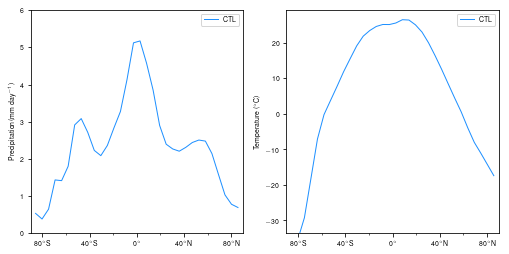

In [5]:
sty = dict(linestyle='-', color='DodgerBlue', linewidth=1.0, label='CTL')
spec1 = dict(style=sty, ylabel=r'Precipitation (mm day$^{-1}$)', ylim=[0, 6])
spec2 = dict(style=sty, ylabel=r'Temperature ($^{\circ}$C)')
dlist = [zm1, zm2]
slist = [spec1, spec2]
fig = oplot.panel_zonal_mean(dlist, slist)

And if we wanted to add several lines to each one of these panels, we would again use lists for styles and data. Let's read some more data and plot it as well:

In [9]:
# file name
f2 = 'data/gpcp_t21.nc'
f3 = 'data/hadcrut_t21.nc'

# read as data array
da = obrero.read_nc(f2, 'tp')
db = obrero.read_nc(f3, 'tem')

# zonal mean
zm3 = obrero.get_zonal_means(da, time_mean=True)
zm4 = obrero.get_zonal_means(db, time_mean=True)

Using lists we plot:

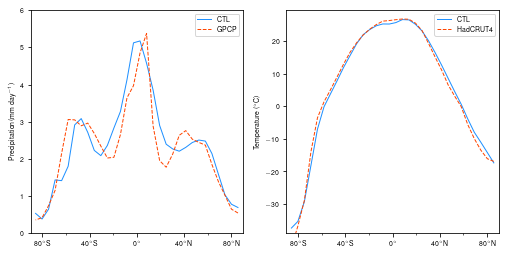

In [13]:
sty2 = dict(linestyle='--', color='OrangeRed', linewidth=1.0, label='GPCP')
sty3 = dict(linestyle='--', color='OrangeRed', linewidth=1.0, label='HadCRUT4')
spec3 = dict(style=[sty, sty2], ylabel=r'Precipitation (mm day$^{-1}$)', ylim=[0, 6])
spec4 = dict(style=[sty, sty3], ylabel=r'Temperature ($^{\circ}$C)')
dlist = [[zm1, zm3], [zm2, zm4]]
slist = [spec3, spec4]
fig = oplot.panel_zonal_mean(dlist, slist)